Proyecto predicción de ventas

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\EQUIPO\Downloads\sales_predictions.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Limpieza de datos

Completando datos en la columna "Item_Weight"

In [8]:
df[["Item_Identifier","Item_Weight"]].sample(frac= 0.01)

,Item_Identifier,Item_Weight
6747,FDT60,NaN
8446,FDT04,17.250
1623,FDY12,9.800
966,DRF23,4.610
81,FDN04,11.800
...,...,...
635,FDT32,NaN
1348,FDG17,6.865
7749,FDG05,11.000
5148,FDS21,NaN


In [9]:
df[df["Item_Identifier"] == "FDK27"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2489,FDK27,11.0,Low Fat,0.008960,Meat,119.1756,OUT049,1999,Medium,Tier 1,Supermarket Type1,1696.4584
5872,FDK27,11.0,Low Fat,0.008945,Meat,122.3756,OUT035,2004,Small,Tier 2,Supermarket Type1,2059.9852
6275,FDK27,11.0,Low Fat,0.008997,Meat,119.9756,OUT017,2007,NaN,Tier 2,Supermarket Type1,1938.8096
7238,FDK27,NaN,Low Fat,0.008903,Meat,120.9756,OUT027,1985,Medium,Tier 3,Supermarket Type3,2787.0388
8358,FDK27,NaN,Low Fat,0.015664,Meat,122.2756,OUT019,1985,Small,Tier 1,Grocery Store,121.1756


In [10]:
df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].transform(pd.Series.mean).fillna(df["Item_Weight"])

In [11]:
df[df["Item_Identifier"] == "FDK27"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2489,FDK27,11.0,Low Fat,0.008960,Meat,119.1756,OUT049,1999,Medium,Tier 1,Supermarket Type1,1696.4584
5872,FDK27,11.0,Low Fat,0.008945,Meat,122.3756,OUT035,2004,Small,Tier 2,Supermarket Type1,2059.9852
6275,FDK27,11.0,Low Fat,0.008997,Meat,119.9756,OUT017,2007,NaN,Tier 2,Supermarket Type1,1938.8096
7238,FDK27,11.0,Low Fat,0.008903,Meat,120.9756,OUT027,1985,Medium,Tier 3,Supermarket Type3,2787.0388
8358,FDK27,11.0,Low Fat,0.015664,Meat,122.2756,OUT019,1985,Small,Tier 1,Grocery Store,121.1756


Eliminando algunos datos vacios en "Item_Weight"

In [12]:
x = df["Item_Weight"].isna()
df.loc[x,["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
927,FDN52,NaN
1922,FDK57,NaN
4187,FDE52,NaN
5022,FDQ60,NaN


In [13]:
df["Item_Weight"].isna().value_counts()

Item_Weight
False    8519
True        4
Name: count, dtype: int64

In [14]:
df.drop([927,1922,4187,5022],inplace = True)

In [15]:
df["Item_Weight"].isna().value_counts()

Item_Weight
False    8519
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Completando datos vacios en "Item_Weight"

In [17]:
y = df["Outlet_Size"].isna()
df.loc[y,["Outlet_Size","Item_Weight"]]

,Outlet_Size,Item_Weight
3,NaN,19.200
8,NaN,16.200
9,NaN,19.200
25,NaN,13.000
28,NaN,5.925
...,...,...
8502,NaN,8.420
8508,NaN,11.350
8509,NaN,8.100
8514,NaN,15.000


In [18]:
valor_2007 = df['Outlet_Establishment_Year'] == 2002
df.loc[valor_2007,["Outlet_Identifier",'Outlet_Establishment_Year',"Outlet_Size"]].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
loca = df['Outlet_Size'] == "Small"
df.loc[loca,["Outlet_Size","Outlet_Location_Type"]]

,Outlet_Size,Outlet_Location_Type
11,Small,Tier 1
13,Small,Tier 1
15,Small,Tier 1
19,Small,Tier 2
22,Small,Tier 2
...,...,...
8510,Small,Tier 2
8513,Small,Tier 2
8517,Small,Tier 1
8520,Small,Tier 2


In [20]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2790
Small     2387
High       932
Name: count, dtype: int64

In [21]:
df['Outlet_Size'].isna().value_counts()

Outlet_Size
False    6109
True     2410
Name: count, dtype: int64

In [22]:
df["Outlet_Size"] = df['Outlet_Size'].fillna("High")

In [23]:
df['Outlet_Size'].value_counts()

Outlet_Size
High      3342
Medium    2790
Small     2387
Name: count, dtype: int64

In [24]:
df['Item_Outlet_Sales'].isna().value_counts()

Item_Outlet_Sales
False    8519
Name: count, dtype: int64

Resúmenes estadísticos

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular'})

In [27]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5404
Regular    3003
low fat     112
Name: count, dtype: int64

### Visualización de Datos 

Gráfico N° 1 'total ventas por tipo de tienda'

In [28]:
agrupacion1 = df.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'sum'}).round(2).sort_values('Item_Outlet_Sales').reset_index()
agrupacion1

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,367913.76
1,Supermarket Type2,1851822.83
2,Supermarket Type3,3444468.36
3,Supermarket Type1,12917342.26


In [29]:
import plotly.express as px

In [30]:
fg = px.histogram(agrupacion1,x='Item_Outlet_Sales',y ='Outlet_Type', color='Outlet_Type')
fg.update_layout(title_text = 'Total ventas por tipo de tienda',title_x=0.5)
fg.update_xaxes(title_text = 'Total')
fg.update_yaxes(title_text = 'Tipo de tienda')
fg.update_legends(title_text = 'Tipo de deporte')

Gráfico N° 2 'total ventas por tipo de tienda'

In [31]:
agrupacion2 = df.groupby(['Outlet_Type','Outlet_Location_Type']).agg({'Item_Identifier':'count'}).reset_index()
agrupacion2

,Outlet_Type,Outlet_Location_Type,Item_Identifier
0,Grocery Store,Tier 1,527
1,Grocery Store,Tier 3,555
2,Supermarket Type1,Tier 1,1860
3,Supermarket Type1,Tier 2,2785
4,Supermarket Type1,Tier 3,932
5,Supermarket Type2,Tier 3,928
6,Supermarket Type3,Tier 3,932


In [32]:
fg = px.histogram(agrupacion2,x='Outlet_Type',y ='Item_Identifier', color='Outlet_Location_Type')
fg.update_layout(title_text = 'Total de items en cada tienda por locación',title_x=0.5)
fg.update_xaxes(title_text = 'Tipo de tienda ')
fg.update_yaxes(title_text = 'Tipo de items')
fg.update_legends(title_text = 'Tipo de locación')




### Preprocesamiento

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Visualizando las columnas categoricas

In [37]:
for column in df.select_dtypes(exclude='number').columns:
    print('-'*30)
    print(f'** {column} ***')
    print(df[column].value_counts())
    print('-'*30)
    input('Presione enter para continuar...')
    print('')

------------------------------
** Item_Identifier ***
Item_Identifier
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: count, Length: 1555, dtype: int64
------------------------------

------------------------------
** Item_Fat_Content ***
Item_Fat_Content
Low Fat    5404
Regular    3003
low fat     112
Name: count, dtype: int64
------------------------------

------------------------------
** Item_Type ***
Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: coun

Eliminación de columnas innecesarias

In [38]:
df =  df.drop(columns=['Outlet_Identifier', 'Item_Identifier'])

In [39]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,High,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,High,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Vizualiar distribución de los datos

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

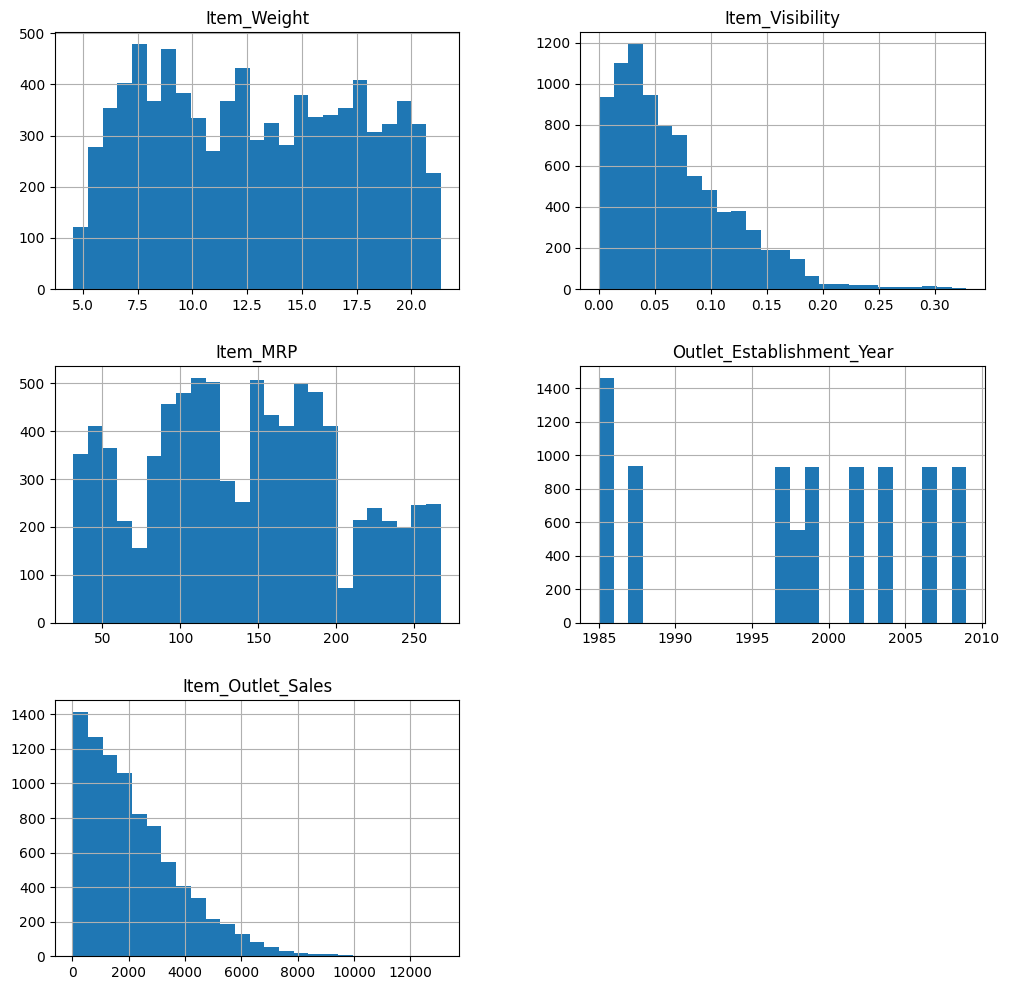

In [40]:
df.hist(bins=25, figsize=(12, 12), xlabelsize='10', ylabelsize='10')

<Axes: >

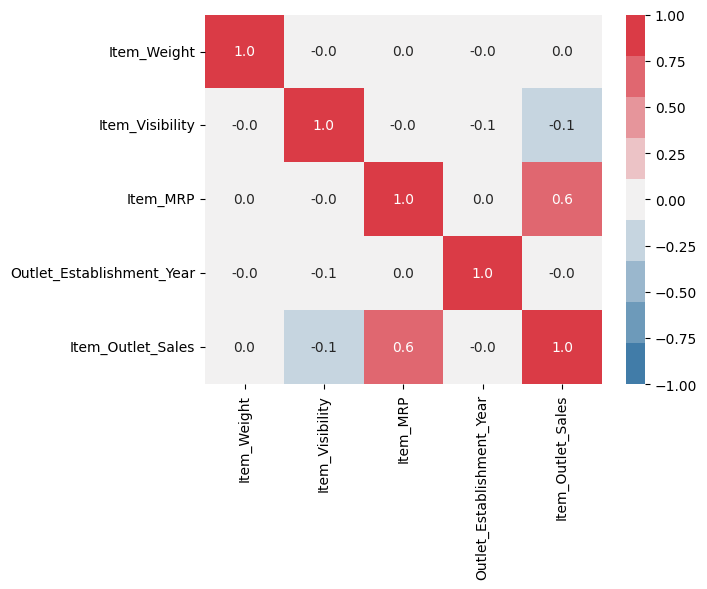

In [42]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include='number').corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True, fmt='.1f', vmin=-1, vmax=1
            )

### Preprocesamiento

División de datos

In [44]:
X = df.drop('Item_Outlet_Sales', axis=1)
X.shape

(8519, 9)

In [45]:
y = df['Item_Outlet_Sales']

Transformación de nuestros datos

In [51]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [61]:
for column in df.select_dtypes(exclude='number').columns:
    print('-'*30)
    print(f'** {column} ***')
    print(df[column].value_counts())
    print('-'*30)
    input('Presione enter para continuar...')
    print('')

------------------------------
** Item_Fat_Content ***
Item_Fat_Content
Low Fat    5404
Regular    3003
low fat     112
Name: count, dtype: int64
------------------------------

------------------------------
** Item_Type ***
Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------

------------------------------
** Outlet_Size ***
Outlet_Size
High      3342
Medium    2790
Small     2387
Name: count, dtype: int64
------------------------------

------------------------------
** Outlet_Location_Type ***
Ou

In [57]:
num_selector = make_column_selector(dtype_include='number')
colums_nominal = ['Item_Fat_Content','Item_Type','Outlet_Type']
colums_ordinal = ['Outlet_Size','Outlet_Location_Type']

In [58]:
standard_scaler = StandardScaler()
ordinal_encode = OrdinalEncoder()
nominal_encode = OneHotEncoder()

In [64]:
col_transformer = make_column_transformer((make_pipeline(nominal_encode), colums_nominal),
                                          (make_pipeline(ordinal_encode), colums_ordinal),
                                          (make_pipeline(standard_scaler), num_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F27B2DE110>)])

In [65]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Type']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F27B2DE110>)])

In [66]:
aux = col_transformer.transform(X)

In [67]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pipeline-1__Item_Fat_Content_Low Fat         8519 non-null   float64
 1   pipeline-1__Item_Fat_Content_Regular         8519 non-null   float64
 2   pipeline-1__Item_Fat_Content_low fat         8519 non-null   float64
 3   pipeline-1__Item_Type_Baking Goods           8519 non-null   float64
 4   pipeline-1__Item_Type_Breads                 8519 non-null   float64
 5   pipeline-1__Item_Type_Breakfast              8519 non-null   float64
 6   pipeline-1__Item_Type_Canned                 8519 non-null   float64
 7   pipeline-1__Item_Type_Dairy                  8519 non-null   float64
 8   pipeline-1__Item_Type_Frozen Foods           8519 non-null   float64
 9   pipeline-1__Item_Type_Fruits and Vegetables  8519 non-null   float64
 10  

### Prección modelo Regresión Lineal

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_procesado,y, test_size=0.3, random_state=123
)

In [73]:
modelo_regresion = LinearRegression()

Entrenamiento

In [74]:
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = modelo_regresion.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [77]:
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 1245308.5211096616
Coeficiente de determinación (R^2): 0.565168126447042


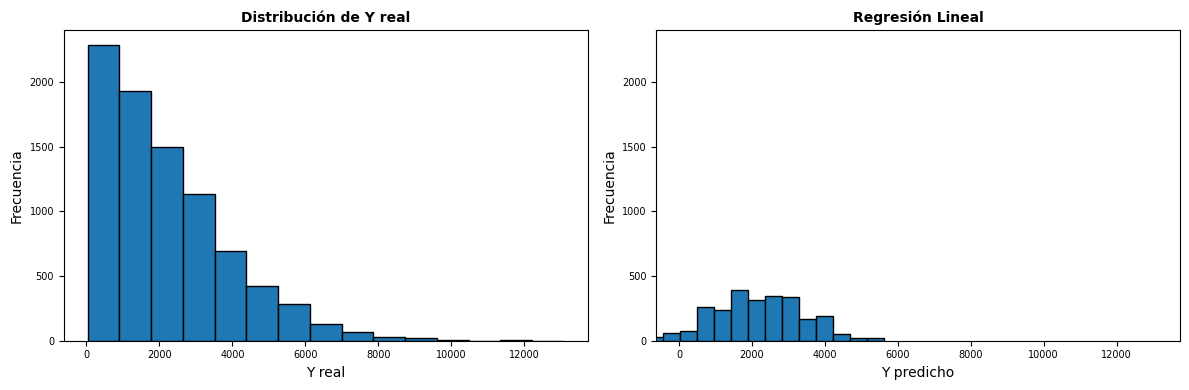

In [79]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

y_test = y

ax1 = plt.subplot(1,2,1)
ax1.hist(y_test, bins=15, edgecolor='black')
ax1.set_title('Distribución de Y real', fontsize=10, fontweight="bold")
ax1.set_xlabel('Y real')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(labelsize=7)
ylim_ax1 = ax1.get_ylim()
xlim_ax1 = ax1.get_xlim()

ax2 = plt.subplot(1,2,2)
ax2.hist(y_pred, bins=15, edgecolor='black')
ax2.set_title('Regresión Lineal', fontsize=10, fontweight="bold")
ax2.set_xlabel('Y predicho')
ax2.set_ylabel('Frecuencia')
ax2.tick_params(labelsize=7)
ax2.set_ylim(ylim_ax1)
ax2.set_xlim(xlim_ax1)

plt.tight_layout()
plt.show()